In [4]:
# Import modules

import pandas as pd
import numpy as np
from datetime import datetime

from shapely import wkt
import matplotlib.pyplot as plt
%matplotlib inline

from geodaisy import GeoObject
from geojson import Point, Feature, FeatureCollection, dump

pd.set_option('display.max_columns', None)

Import GPS data:

In [5]:
gps_flags = pd.read_csv('../results/combined_sample_flags.csv')
gps_flags.head()

,date,store_name,store_id,device_id,gps_location
0,1609535794000,McDonald's,place_25,6790,POINT (13.5471486 52.4318503)
1,1609517160000,McDonald's,place_29,13577,POINT (13.388066 52.519994)
2,1609495691000,Rewe,place_141,8549,POINT (13.2439761 52.6149546)
3,1609520578000,McDonald's,place_25,9288,POINT (13.54691 52.43191899999999)
4,1609513267000,McDonald's,place_18,7144,POINT (13.59309 52.44798)


In [6]:
gps_flags['gps_location'] = gps_flags['gps_location'].apply(wkt.loads)

Text(0.5, 1.0, 'GPS locations within stores (sample dataset)')

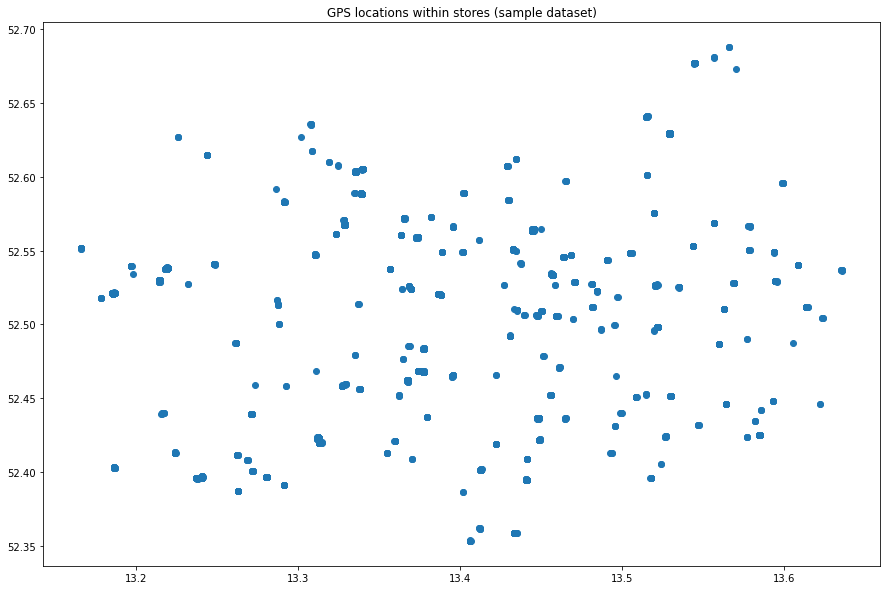

In [8]:
fig, ax = plt.subplots(figsize = (15,10))

xs = [point.x for point in gps_flags['gps_location']]
ys = [point.y for point in gps_flags['gps_location']]
plt.scatter(xs, ys)
plt.title('GPS locations within stores (sample dataset)')

The plot above appears to show a rough outline of Berlin. To clarify, the next step is to visualise the data in Tableau...

Use geodaisy to convert WKT data into GeoJSON:

In [89]:
gps_geojson_list = []

for polygon in gps_flags['gps_location']:
    gps_geojson_list.append(GeoObject(polygon))
gps_flags['gps_geojson'] = gps_geojson_list

In [90]:
gps_flags.head()

,date,store_name,store_id,device_id,gps_location,gps_geojson
0,1609504091000,McDonald's,place_28,838,POINT (13.3863778 52.52029889999999),"{'type': 'Point', 'coordinates': (13.3863778, ..."
1,1609526776000,Rewe,place_198,1597,POINT (13.3697391 52.5239484),"{'type': 'Point', 'coordinates': (13.3697391, ..."
2,1609514684000,McDonald's,place_14,1620,POINT (13.3078575 52.6356204),"{'type': 'Point', 'coordinates': (13.3078575, ..."
3,1609459427000,Mercedes,place_233,2022,POINT (13.439094 52.505726),"{'type': 'Point', 'coordinates': (13.439094, 5..."
4,1609508741000,Kaufland,place_215,2317,POINT (13.2192194 52.537559),"{'type': 'Point', 'coordinates': (13.2192194, ..."


In [91]:
# gps_flags['date'] = pd.to_datetime(gps_flags['date'], unit='ms').dt.normalize()

Decided against changing the 'date' field to datetime, as it can cause problems with JSON serialisation.

To avoid this it is possible to add 'default=str' to the 'dump' command in the following coding section:

Use geojson to export the DF to a GeoJSON file, which enables visualisation in Tableau:

In [ ]:
gps_features = []

for date, name, store, device, point in zip(
    gps_flags['date'], gps_flags['store_name'], gps_flags['store_id'], gps_flags['device_id'], gps_flags['gps_geojson']):
    gps_features.append(Feature(geometry=point, properties={'date': date, 'store_name': name, 'store_id': store, 'device_id': device}))
    gps_feature_collection = FeatureCollection(gps_features)
    with open(f'../results/gps_sample_flags.geojson', 'w') as f:
        dump(gps_feature_collection, f)

Link to Tableau visualisation - https://public.tableau.com/profile/paul.musco#!/vizhome/adsquare_sample_gps_flags/Sheet1